In [176]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('datasets/wdbc.csv').drop(columns = ['ID'])
df

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,concave_points1,symmetry3,fractal_dimension3
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# 1. Business/data understanding
The data includes Data Description:

Number of instances: 569
Number of features: 30
Target variable: Cancer diagnosis (M = Malignant, B = Benign)
Feature characteristics: Real-valued, computed from cell nucleus images

The features describe various characteristics of cell nuclei present in the digitized image, including:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry 

j) fractal dimension ("coastline approximation" - 1)

In [177]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()

df.Diagnosis.unique()

df['Diagnosis'] = pd.Categorical(df['Diagnosis'])

df['Diagnosis'] = df['Diagnosis'].astype(str)
df['Diagnosis'] = df['Diagnosis'].replace({'M': 1, 'B': 0})
df['Diagnosis'] = df['Diagnosis'].astype('category')

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

C:\Users\onnil\AppData\Local\Temp\ipykernel_18428\936038277.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diagnosis'] = df['Diagnosis'].replace({'M': 1, 'B': 0})


In [178]:
X = df.drop(columns = 'Diagnosis')
Y = df['Diagnosis'] # targets

model = KNeighborsClassifier(n_neighbors = 2)
model.fit(df_scaled, Y)

KNeighborsClassifier(n_neighbors=2)

Accuracy of kNN classifier on the test set: 0.93
Accuracy of kNN classifier on the training set: 0.94 (EXERCISE CAUTION!)


Text(0, 0.5, 'True Labels')

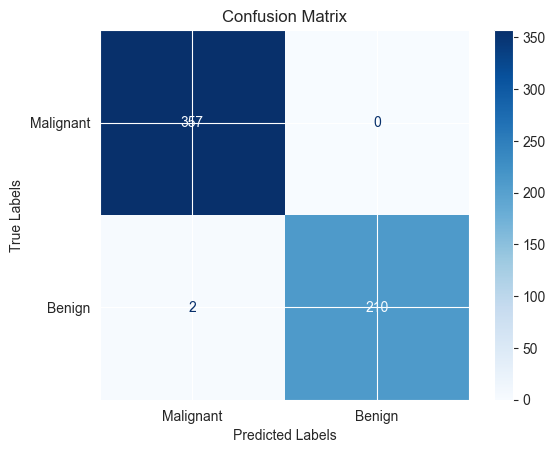

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy of kNN classifier on the test set: {accuracy_test:.2f}")

# This is just to show the difference between training and test accuracy
y_train_pred = knn.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Accuracy of kNN classifier on the training set: {accuracy_train:.2f} (EXERCISE CAUTION!)")

y_pred = model.predict(df_scaled)

# Create a ConfusionMatrixDisplay object
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant', 'Benign'])

# Plot the confusion matrix with additional parameters for clarity
cmd.plot(cmap='Blues')
cmd.ax_.set_title('Confusion Matrix')
cmd.ax_.set_xlabel('Predicted Labels')
cmd.ax_.set_ylabel('True Labels')